For our project, we want the best neighborhood to be the most eco-friendly and greenest. For my data set, I chose the Allegheny County Air Quality for the ecological side of it. I also decided to use the Daily AQI Data because it will be more easier to handle than the Hourly AQI Data.
    
    * Submetric 1: Air Quality Index Value (AQI)

The neighborhood that will be the most eco-friendly and greenest will be a place where there are lesser buildings and pollutions and more parks. Therefore, I think that Squirrel Hill will rank pretty high because it has Frick Park and Schenley Park which are both very big parks. This is also my favorite neighborhood. 

Data set 1: [Allegheny County Air Quality](https://data.wprdc.org/dataset/allegheny-county-air-quality)

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
# Read the CSV file
airquality = pd.read_csv("airquality.csv")

In [50]:
# Combine 'Lawrenceville' and 'Lawrenceville2' into 'Lawrenceville'
airquality.loc[airquality['site'].str.contains('Lawrenceville'), 'site'] = 'Lawrenceville'

# Combine 'Liberty' and 'Liberty2' into 'Liberty'
airquality.loc[airquality['site'].str.contains('Liberty'), 'site'] = 'Liberty'

The data set separates Lawrenceville into Lawrenceville and Lawrenceville2, so I combined them both to make it easier to analzye. I also did the same thing for Liberty, since the data was also separated.

In [51]:
# Pivot the dataframe to get 'site' as rows, 'parameter' as columns, and 'index_value' as values
heatmap_data = airquality.pivot_table(index='site', columns='parameter', values='index_value', aggfunc='mean')

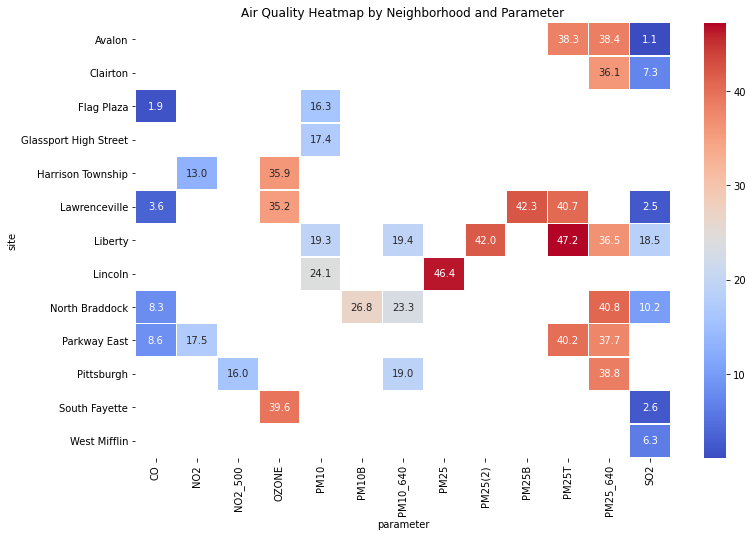

In [52]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
plt.title('Air Quality Heatmap by Neighborhood and Parameter')
plt.show()

I realize that a Heatmap isn't that useful for me to analyze which neighborhood is the best, so instead I am going to plot a bar chart.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
# Read the CSV file
airquality = pd.read_csv("airquality.csv")

In [33]:
# Combine 'Lawrenceville' and 'Lawrenceville2' into 'Lawrenceville'
airquality.loc[airquality['site'].str.contains('Lawrenceville'), 'site'] = 'Lawrenceville'

# Combine 'Liberty' and 'Liberty2' into 'Liberty'
airquality.loc[airquality['site'].str.contains('Liberty'), 'site'] = 'Liberty'

In [34]:
# Create a new column 'neighborhood' with complete site names
airquality['neighborhood'] = airquality['site']

In [35]:
# Group by 'neighborhood' and calculate the mean of 'index_value' for each neighborhood
grouped_data = airquality.groupby('neighborhood')['index_value'].mean().reset_index()

To compare the air quality index values(AQI), I took the mean index values for each neighborhoods and compared them. The neighborhood with the lowest AQI will be the most eco-friendly/greenest neighborhood.

In [46]:
# Sort the data by 'index_value' for better visualization
grouped_data = grouped_data.sort_values(by='index_value', ascending=True)

# Increase the figure size
plt.figure(figsize=(12, 8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

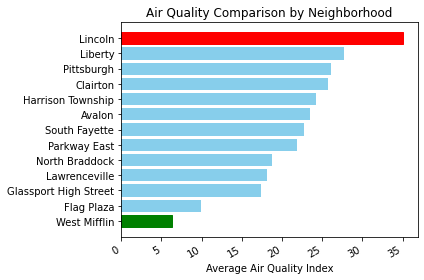

In [47]:
# Plot a horizontal bar chart
bars = plt.barh(range(len(grouped_data)), grouped_data['index_value'], color='skyblue')

# Highlight the best and worst neighborhoods
best_neighborhood = grouped_data['neighborhood'].iloc[0]
worst_neighborhood = grouped_data['neighborhood'].iloc[-1]

# Customize the y-axis ticks and labels
plt.yticks(range(len(grouped_data)), grouped_data['neighborhood'])

# Ensure that the complete neighborhood names are displayed
plt.gcf().autofmt_xdate()

# Iterate through the bars to set colors
for i, (bar, neighborhood) in enumerate(zip(bars, grouped_data['neighborhood'])):
    if neighborhood == best_neighborhood:
        bar.set_color('green')
    elif neighborhood == worst_neighborhood:
        bar.set_color('red')
        
plt.xlabel('Average Air Quality Index')
plt.title('Air Quality Comparison by Neighborhood')
plt.tight_layout()
plt.show()

I want to get the exact AQI values for each neighborhood, so I will plot a table.

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
# Group by 'neighborhood' and calculate the mean of 'index_value' for each neighborhood
neighborhood_summary = airquality.groupby('neighborhood')['index_value'].agg(['mean', 'count']).reset_index()
neighborhood_summary = neighborhood_summary.rename(columns={'mean': 'Average_AQI', 'count': 'Observation_Count'})

# Sort the data by 'Average_AQI' for better visualization
neighborhood_summary = neighborhood_summary.sort_values(by='Average_AQI', ascending=True)

# Display the new table
print(neighborhood_summary)

             neighborhood  Average_AQI  Observation_Count
12           West Mifflin     6.335548                301
2              Flag Plaza     9.949275               4002
3   Glassport High Street    17.414531               2849
5           Lawrenceville    18.138481              10088
8          North Braddock    18.741152               7205
9            Parkway East    21.899275               8548
11          South Fayette    22.684232               4991
0                  Avalon    23.464221               4416
4       Harrison Township    24.288941               5534
1                Clairton    25.732824                917
10             Pittsburgh    26.133024               2586
6                 Liberty    27.697880               8490
7                 Lincoln    35.108002               3574


Based on only the air quality index value submetric, I have come to the conclusion that the most eco friendly neighborhood is West Mifflin because it has the lowest average air quality index value of 6.336. The neighborhood with the highest air quality index value is Lincoln, which has an average of 35.108.